In [1]:
!gdown 1zqToCWKa8GyigYc2HpGDo6OrM3DQu-tg&export=download

Downloading...
From: https://drive.google.com/uc?id=1zqToCWKa8GyigYc2HpGDo6OrM3DQu-tg
To: /content/tqdm-final.zip
100% 227M/227M [00:06<00:00, 34.8MB/s]


In [2]:
!unzip tqdm-final.zip

Archive:  tqdm-final.zip
  inflating: tqdm-final.csv          


In [32]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=d4088128978b6396f3d18378ca298b5781184621b1f146671466771feaa1ba81
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [34]:
!pip install nltk contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 28.0 MB/s eta 0:00:00


In [35]:
import pandas as pd

import glob
import os
import sys
import matplotlib.pyplot as plt
import wordcloud
import emoji
import re
import nltk
import wordcloud
import contractions
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# Read csv
df = pd.read_csv('tqdm-final.csv', lineterminator='\n', index_col=0)
df

,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media
0,2023-02-08 13:15:23+00:00,1623309519983083520,89-member medical team has been dispatched by ...,bhat_anabiya,en,NaN,0,0,2,0,NaN
1,2023-02-08 13:15:01+00:00,1623309426550534144,EARTHQUAKE RELIEF IN TURKEY | Aerial Recovery\...,MorganOrtagus,en,NaN,1,8,52,0,NaN
2,2023-02-08 13:14:49+00:00,1623309377900879874,The Mozaik Foundation have launched an Emergen...,wychwoodschool,en,NaN,0,0,1,0,NaN
3,2023-02-08 13:14:23+00:00,1623309266114211846,This call to contribute to earthquake relief i...,JElyachar,en,['turkey'],0,22,45,0,NaN
4,2023-02-08 13:13:59+00:00,1623309165304094721,In compliance with the royal orders of Sultan ...,samawaheed89,en,"['The', 'Oman', 'earthquakeinturkey', 'EastMed...",0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1688371,2023-02-16 14:59:04+00:00,1626234715828260866,President of 🇹🇷 Tayyip Erdogan has welcomed 🇵🇰...,BasitSubhani,en,['TurkeyEarthquake'],5,3,18,0,[Photo(previewUrl='https://pbs.twimg.com/media...
1688372,2023-02-16 14:59:03+00:00,1626234711541690371,ما الظلم الذي ارتكبه أهل هذه المناطق حتى يزلزل...,meral_m_qassem,ar,"['زلزال_تركيا_سوريا', 'زلزال', 'earthquake']",0,0,0,0,NaN
1688373,2023-02-16 14:59:01+00:00,1626234700451966983,🇩🇿 Mehdi Boudjemaa has joined Hungary's Ferenc...,Algeria_FC,en,NaN,3,3,65,0,[Photo(previewUrl='https://pbs.twimg.com/media...
1688374,2023-02-16 14:58:58+00:00,1626234687260852224,This is so shocking😱😱😱\n#Antakya before and af...,SAADULLAHMAHAR,en,"['Antakya', 'earthquake']",0,0,5,0,NaN


In [8]:
print(df.head())

                    DateTime              TweetId  \
0  2023-02-08 13:15:23+00:00  1623309519983083520   
1  2023-02-08 13:15:01+00:00  1623309426550534144   
2  2023-02-08 13:14:49+00:00  1623309377900879874   
3  2023-02-08 13:14:23+00:00  1623309266114211846   
4  2023-02-08 13:13:59+00:00  1623309165304094721   

                                                Text        Username Language  \
0  89-member medical team has been dispatched by ...    bhat_anabiya       en   
1  EARTHQUAKE RELIEF IN TURKEY | Aerial Recovery\...   MorganOrtagus       en   
2  The Mozaik Foundation have launched an Emergen...  wychwoodschool       en   
3  This call to contribute to earthquake relief i...       JElyachar       en   
4  In compliance with the royal orders of Sultan ...    samawaheed89       en   

                                            Hashtags  ReplyCount  \
0                                                NaN           0   
1                                                NaN      

In [9]:
print(df.shape[0])

1688376


In [87]:
pd.options.display.float_format = '{:.0f}'.format

# Distribution of data features!
print(df.describe())

                  TweetId  ReplyCount  RetweetCount  LikeCount  QuoteCount
count              679071      679071        679071     679071      679071
mean  1625164290669715200           1             9         38           1
std      2931069421855033          28           218        998          22
min   1622180249847873536           0             0          0           0
25%   1622931696413732864           0             0          0           0
50%   1624072588036132864           0             0          1           0
75%   1626617727571087360           0             1          4           0
max   1637604731622240256        9717        117782     290978        7667


In [89]:
df["date"] = df["DateTime"].astype("datetime64").dt.date

In [90]:
print(df.head())

                    DateTime              TweetId  \
0  2023-02-08 13:15:23+00:00  1623309519983083520   
1  2023-02-08 13:15:01+00:00  1623309426550534144   
2  2023-02-08 13:14:49+00:00  1623309377900879874   
3  2023-02-08 13:14:23+00:00  1623309266114211846   
4  2023-02-08 13:13:59+00:00  1623309165304094721   

                                                Text        Username Language  \
0  89-member medical team has been dispatched by ...    bhat_anabiya       en   
1  EARTHQUAKE RELIEF IN TURKEY | Aerial Recovery\...   MorganOrtagus       en   
2  The Mozaik Foundation have launched an Emergen...  wychwoodschool       en   
3  This call to contribute to earthquake relief i...       JElyachar       en   
4  In compliance with the royal orders of Sultan ...    samawaheed89       en   

                                            Hashtags  ReplyCount  \
0                                                NaN           0   
1                                                NaN      

date
2023-02-05       922
2023-02-06    127849
2023-02-07     83927
2023-02-08     55444
2023-02-09     46871
2023-02-10     39249
2023-02-11     29909
2023-02-12     26052
2023-02-13     27248
2023-02-14     22539
2023-02-15     22834
2023-02-16     16396
2023-02-17     14626
2023-02-18     15108
2023-02-19     11739
2023-02-20     25530
2023-02-21     17373
2023-02-22     10014
2023-02-23     11171
2023-02-24      8789
2023-02-25      9884
2023-02-26      7149
2023-02-27      9579
2023-02-28      3628
2023-03-01      3234
2023-03-02      2731
2023-03-03      2301
2023-03-04      2007
2023-03-05      2134
2023-03-06      2851
2023-03-07      2526
2023-03-08      1728
2023-03-09      1910
2023-03-10      1562
2023-03-11      1023
2023-03-12      1437
2023-03-13      1731
2023-03-14      1451
2023-03-15      1531
2023-03-16      1555
2023-03-17      1401
2023-03-18      1087
2023-03-19      1041
Name: TweetId, dtype: int64


<Axes: title={'center': 'Date distribution of tweets'}, xlabel='Date', ylabel='Number of tweets posted under search: earthquake'>

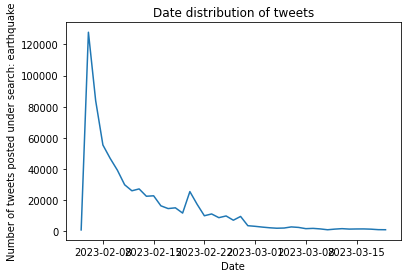

In [69]:
data = df.groupby(df['date'])['TweetId'].count()
print(data)
data.plot(kind='line', title='Date distribution of tweets', ylabel='Number of tweets posted under search: earthquake',
         xlabel='Date')

Language
en    679071
Name: Language, dtype: int64


<Axes: title={'center': 'Language distribution'}, xlabel='Number of tweets', ylabel='Language of the tweet'>

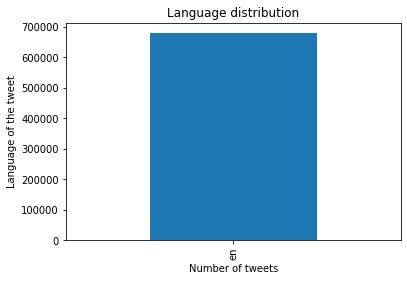

In [70]:
langs = df.groupby('Language')['Language'].count().sort_values(ascending=False)
print(langs)

langs.head(10).plot(kind='bar', title='Language distribution', ylabel='Language of the tweet',
         xlabel='Number of tweets')

In [71]:
#Data-Cleaning
#Remove duplicates if any
df['Text']=df['Text'].apply(str)
lenBeforeDuplicatesDrop = df.shape[0]
df.drop_duplicates(inplace=True, subset="TweetId")
lenAfterDuplicatesDrop = df.shape[0]

<ipython-input-71-be0bcec26e90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text']=df['Text'].apply(str)
<ipython-input-71-be0bcec26e90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True, subset="TweetId")


In [72]:
#Remove dates
df["processed_text"] = df["Text"].str.replace("\d{1,2}\s\w*\s\d{4}\s-\s","")

<ipython-input-72-97016dc13cea>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["processed_text"] = df["Text"].str.replace("\d{1,2}\s\w*\s\d{4}\s-\s","")
<ipython-input-72-97016dc13cea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["processed_text"] = df["Text"].str.replace("\d{1,2}\s\w*\s\d{4}\s-\s","")


In [73]:
#Remove special characters and convert case to lower
import re
# Remove punctuation
df['processed_text'] = df['processed_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Lowercase the words
df['processed_text'] = df['processed_text'].map(lambda x: x.lower())

<ipython-input-73-17ca2a27b57d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['processed_text'].map(lambda x: re.sub('[,\.!?]', '', x))
<ipython-input-73-17ca2a27b57d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['processed_text'].map(lambda x: x.lower())


In [74]:
#Remove URLS and username mentions & hashtags
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)
    
df['processed_text'] = df['processed_text'].apply(strip_links)
df['processed_text'] = df['processed_text'].apply(strip_all_entities)

<ipython-input-74-df001d3781d0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['processed_text'].apply(strip_links)
<ipython-input-74-df001d3781d0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['processed_text'].apply(strip_all_entities)


In [75]:
#Remove numerical data
df['processed_text'] = df['processed_text'].str.replace('\d+', '')

<ipython-input-75-84ce33c2ce64>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_text'] = df['processed_text'].str.replace('\d+', '')
<ipython-input-75-84ce33c2ce64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['processed_text'].str.replace('\d+', '')


In [76]:
df.shape[0]

679071

In [77]:
#Remove language other than english
df = df[df["Language"].str.contains("en") == True]
lenAfterEnglishOnly = df.shape[0]

In [78]:
df.shape[0]

679071

In [79]:
#Expand short-forms. i'll -> I will
df['processed_text'] = df['processed_text'].apply(contractions.fix)

In [80]:
my_stopwords = nltk.corpus.stopwords.words('english')

df['processed_text'] = df['processed_text'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))
df['processed_text'] = df['processed_text'].apply(lambda x: " ".join(x.split()))
df['processed_text'] = df['processed_text'].apply(lambda x: " ".join([t for t in x.split() if t not in my_stopwords]))

In [81]:
#Manually remove bad words!
remove_words = ["midnight", "utc", "feb", "february", "km", "amp", "atsu", "min", "ago", "nw", "ne", "time", "one", "U", "g", "u", "g", "am", "pm", "mile", "north", "south"]
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df['processed_text'] = df['processed_text'].str.replace(pat, '')

<ipython-input-81-a3852f787a2e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['processed_text'] = df['processed_text'].str.replace(pat, '')


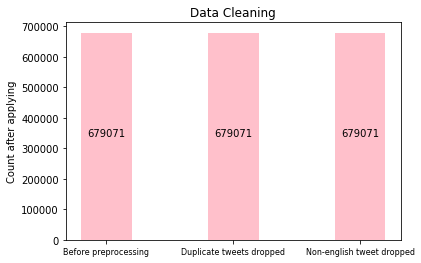

In [82]:
#Visualize preprocessing dataset!
x = ['Before preprocessing', 'Duplicate tweets dropped', 'Non-english tweet dropped']
y = [lenBeforeDuplicatesDrop, lenAfterDuplicatesDrop, lenAfterEnglishOnly]
plt.bar(x, y, color ='pink',
        width = 0.4)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
addlabels(x, y)

plt.xticks(fontsize=8)
plt.ylabel("Count after applying")
plt.title("Data Cleaning")
plt.show()

In [83]:
#Lemmatize text
import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    lst = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    return ' '.join(lst)

df['LemmatizeText'] = df['processed_text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(-0.5, 1599.5, 799.5, -0.5)

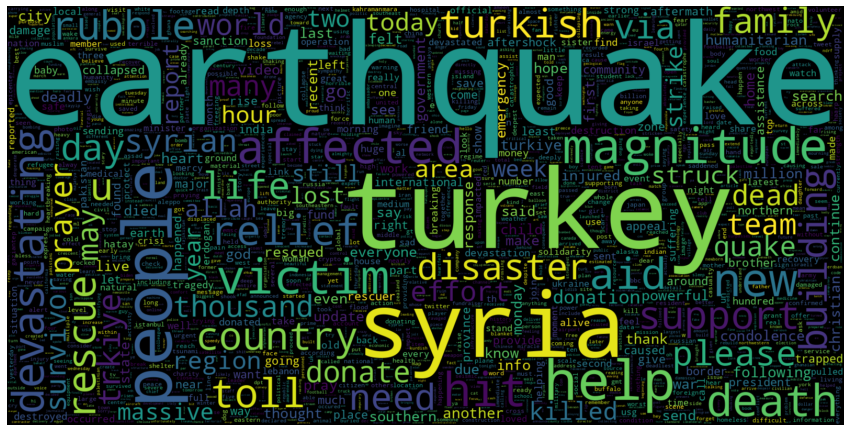

In [84]:
#Generate wordcloud (Visualize)
import wordcloud

word_string=" ".join(df['LemmatizeText'].str.lower())

plt.figure(figsize=(15,15))
wc = wordcloud.WordCloud(collocations=False, background_color="black", stopwords = wordcloud.STOPWORDS, max_words=2000, max_font_size=300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

In [63]:
df.to_csv("679071.csv")
!zip -r /content/679071.zip /content/679071.csv

  adding: content/679071.csv (deflated 73%)


<Axes: title={'center': 'outlier detection'}, ylabel='Number of Outlier tweets'>

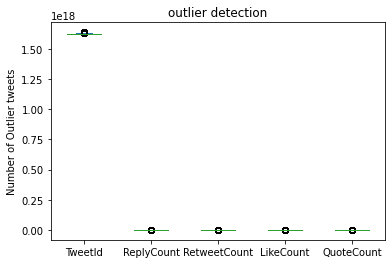

In [85]:
#Outlier Detection
df.plot(kind='box', title='outlier detection', ylabel='Number of Outlier tweets',
         xlabel='Tweet paramters')

In [95]:
#Correlation Matrix
# print(df.shape[0])
# print(df.shape[1])
df.corr()

,TweetId,ReplyCount,RetweetCount,LikeCount,QuoteCount
TweetId,1,-0,-0,-0,-0
ReplyCount,-0,1,0,1,1
RetweetCount,-0,0,1,1,1
LikeCount,-0,1,1,1,1
QuoteCount,-0,1,1,1,1


In [99]:
df["RetweetCount"].count()

679071